# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [ ]:
!pip install praat-parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.7 MB 6.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

import librosa
import parselmouth

In [ ]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

ValueError: ignored

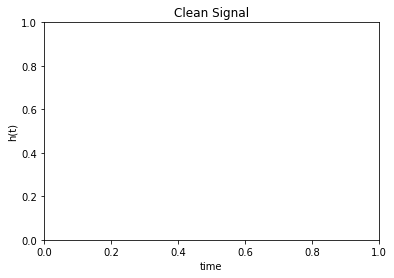

In [ ]:
# TODO 1.1 : plot (1) clean signal and (2) noisy signal with label

# Plot clean signal
plt.title("Clean Signal")
plt.xlabel("time")
plt.ylabel("h(t)")
plt.plot(t, h)
plt.show()

# Plot noisy signal
plt.title("Noisy Signal")
plt.xlabel("time")
plt.ylabel("h_w_noise(t)")
plt.plot(t, h_w_noise)
plt.show()

In [ ]:
# TODO 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max)

H_jw = np.fft.fft(h)
H_jw_noise = np.fft.fft(h_w_noise)
freqs = np.fft.fftfreq(len(H_jw))

plt.title("Magnitude of FFT of the clean signal")
plt.xlabel("freq")
plt.ylabel("H_jw")
plt.plot(freqs ,abs(H_jw))
plt.show()

plt.title("Magnitude of FFT of the noisy signal")
plt.xlabel("freq")
plt.ylabel("H_jw_noise")
plt.plot(freqs ,abs(H_jw_noise))
plt.show()

IndexError: ignored

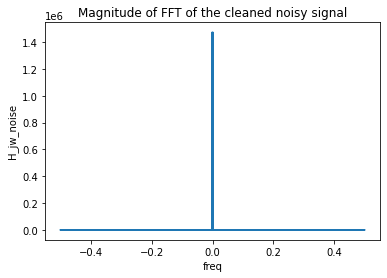

In [ ]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT

H_jw_noise_abs      = np.abs(H_jw_noise)
indices             = H_jw_noise_abs>400000   # filter out those value under 0.4*1e6
H_jw_noise_clean    = indices * H_jw_noise    # noise frequency will be set to 0

plt.title("Magnitude of FFT of the cleaned noisy signal")
plt.xlabel("freq")
plt.ylabel("H_jw_noise")
plt.plot(freqs,np.abs(H_jw_noise_clean))
plt.show()

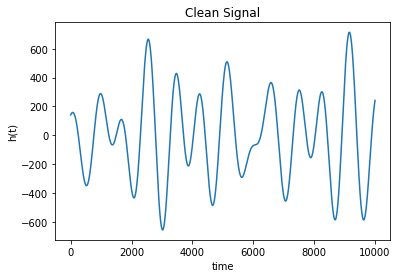

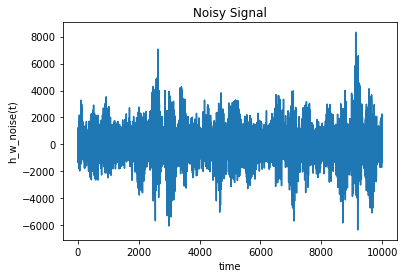

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


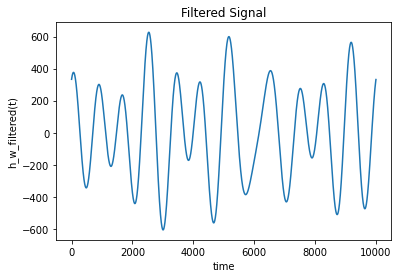

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


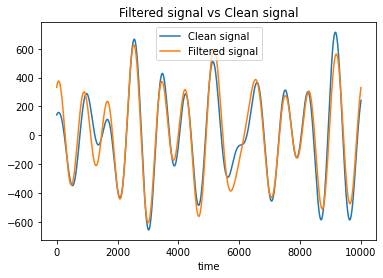

In [ ]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 1.3) with label

# Plot clean signal
plt.title("Clean Signal")
plt.xlabel("time")
plt.ylabel("h(t)")
plt.plot(t, h)
plt.show()

# Plot noisy signal
plt.title("Noisy Signal")
plt.xlabel("time")
plt.ylabel("h_w_noise(t)")
plt.plot(t, h_w_noise)
plt.show()

# Plot filtered signal
h_w_filtered = np.fft.ifft(H_jw_noise_clean)
plt.title("Filtered Signal")
plt.xlabel("time")
plt.ylabel("h_w_filtered(t)")
plt.plot(t, h_w_filtered)
plt.show()

# Plot filtered signal vs clean signal
plt.title("Filtered signal vs Clean signal")
plt.xlabel("time")
plt.plot(t, h, label = "Clean signal")
plt.plot(t, h_w_filtered, label = "Filtered signal")
plt.legend()

In [ ]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered

# (1) Original signal
ipd.Audio(h, rate=N)

In [ ]:
# (2) Signal with noise
ipd.Audio(h_w_noise, rate=N)

In [ ]:
# (3) Signal after filtered
ipd.Audio(h_w_filtered, rate=N)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
# TODO 1.6 : Write to explain and analyze the results
# จากการสร้างไฟล์เสียงทั้ง 3 แล้วลองฟังดู พบว่า
# ไฟล์เสียงของ original signal นั้นเป็นเสียงเงียบ ๆ มีเสียง “กึก” เพียง 2 ครั้ง
# ในขณะที่ไฟล์เสียงของ signal with noise นั้นเป็นเสียง “ซ่า ๆ” ดัง
# ซึ่งเกิดจากการที่สัญญาณของ original signal ถูกเพิ่มคลื่นความถี่อื่นมาด้วย
# โดยเมื่อนำ noisy signal มาทำการแปลงเป็น fourier form แล้ว plot กราฟ
# เปรียบเทียบกับการนำ original signal มาทำการแปลงเป็น fourier form
# แล้ว plot กราฟ ก็พบว่า กราฟ fourier form ของ original signal มีเพียงความถี่ต่ำ
# แต่กราฟ fourier form ของ noisy signal มีความถี่สูงมาผสมอยู่ด้วย
# แต่ fourier form ของ noisy signal ล้วนมีความเข้มของ noise frequency น้อยกว่า 0.4xe^6 ทั้งนั้น
# เพื่อนำกลับมาซึ่งสัญญาณเดิม จึงทำการกรองความถี่ที่มีความเข้มของ frequency น้อยกว่า 0.4xe^6 ทิ้ง
# จากนั้นจึงนำสัญญาณที่กรองแล้วมาแปลง inverse fourier transform กลับแล้วทำเป็นไฟล์เสียง
# ซึ่งพบว่า ไฟล์เสียงของ signal after filtered มีความคล้ายกับไฟล์เสียงของ original signal เป็นอย่างมาก
# จะมีความต่างของความดังของเสียงเพียงเล็กน้อย และเมื่อนำสัญญาณของ original signal และ filtered signal มาเทียบกัน
# ก็ยืนยันได้ว่า filtered signal สามารถคงความเป็น original signal ได้เป็นอย่างดีถึงแม้จะเกิดจากสัญญาณที่มี noise จำนวนมากรบกวน

## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


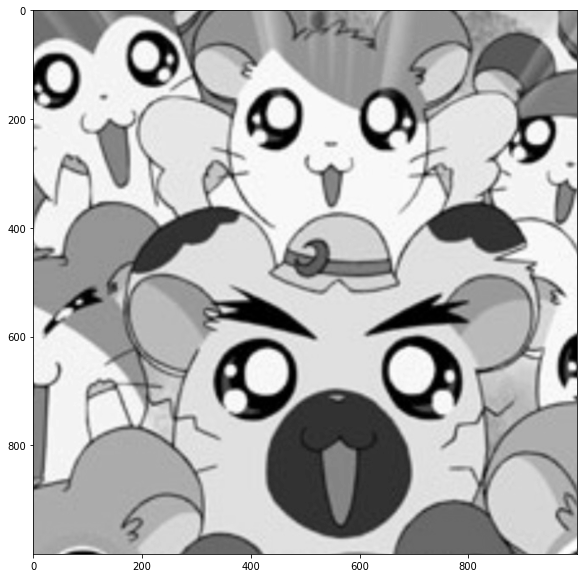

In [ ]:
mypath = "/content/drive/MyDrive/hamtaro.png"
screen_shot = cv2.imread(mypath,0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

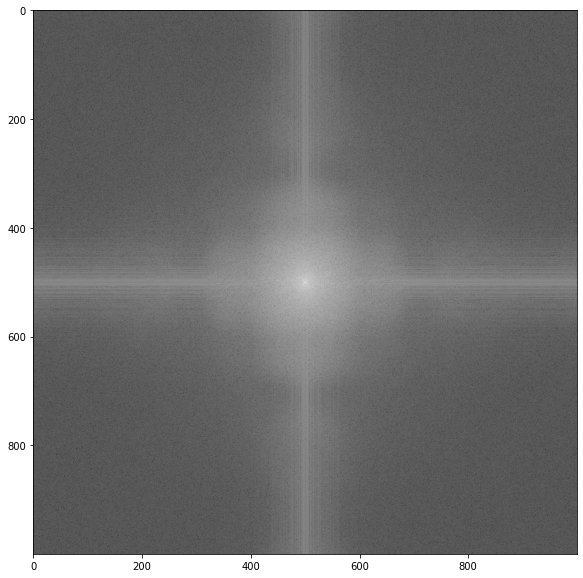

In [ ]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


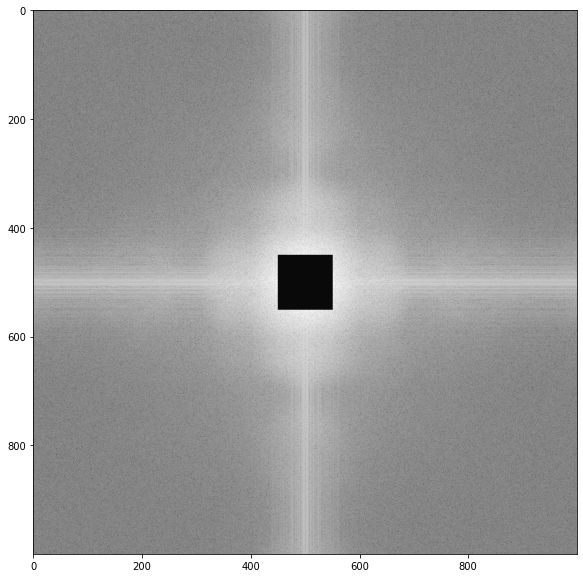

In [ ]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image
n = 100

(w, h) = screen_shot.shape
half_w, half_h = int(w/2), int(h/2)

F2[half_w-int(n/2):half_w+int(n/2)+1,half_h-int(n/2):half_h+int(n/2)+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

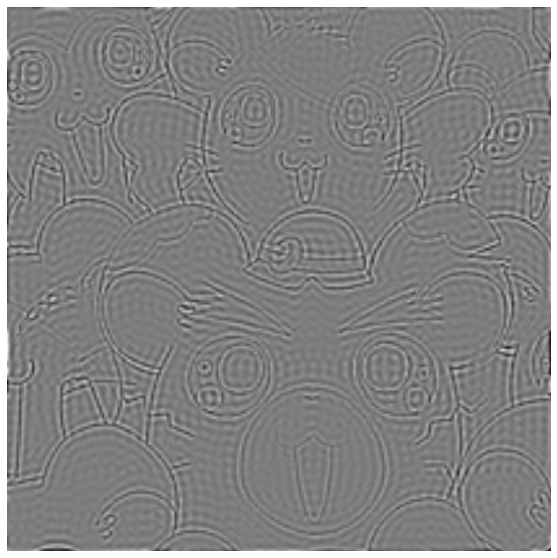

In [ ]:
im1 = fftpack.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

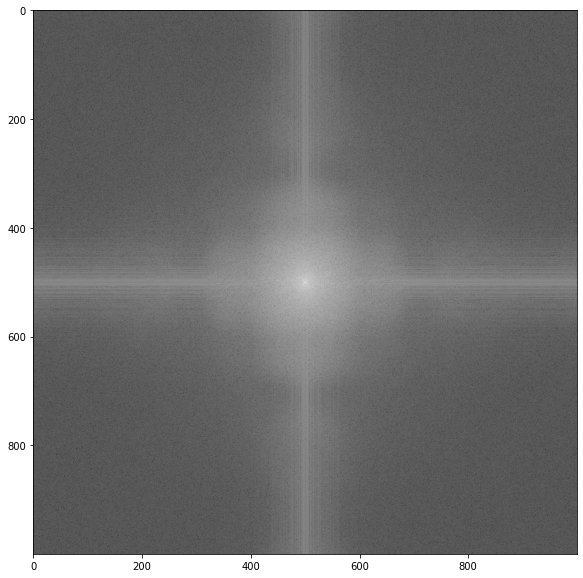

In [ ]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


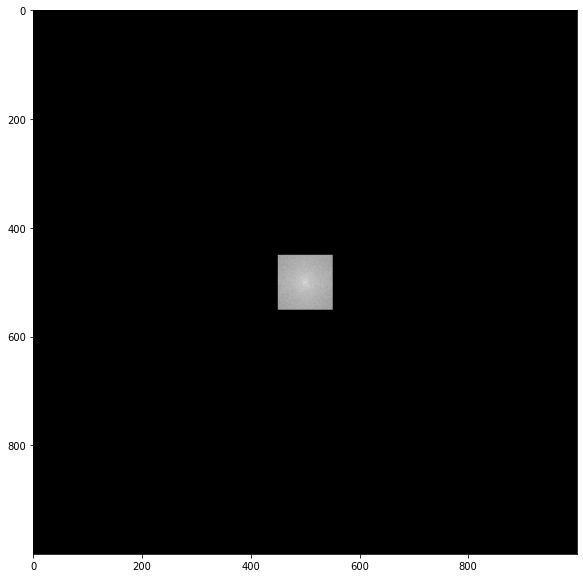

In [ ]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image

n = 100

(w, h) = screen_shot.shape
half_w, half_h = int(w/2), int(h/2)

F2[:half_w-int(n/2), :] = 0
F2[:, half_h+int(n/2)+1:] = 0
F2[:, :half_h-int(n/2)] = 0
F2[half_w+int(n/2)+1:, :] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

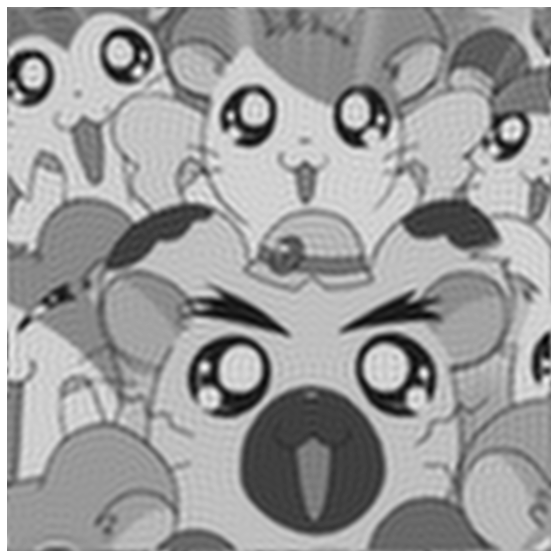

In [ ]:
im1 = fftpack.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

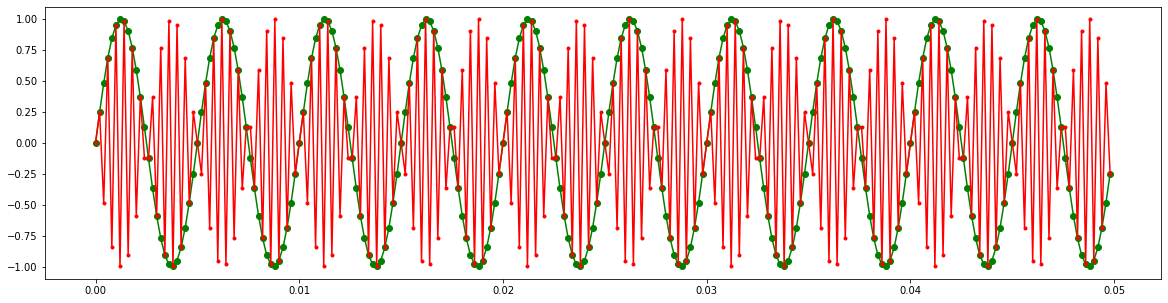

In [ ]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



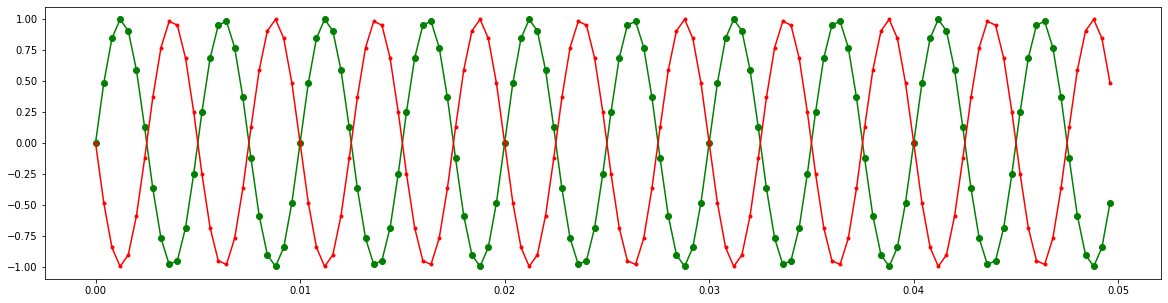

In [ ]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [ ]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [ ]:
x02_ts02

In [ ]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans: